#### Write python code for Designing IIR Filter for Low pass, High pass,Band pass and Band stop filter.Assume Cut-off frequency for low pass and high pass to be 200 hz, for band pass and band stop to be 200 hz to 400 hz.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## IIR Filters  

**IIR (Infinite Impulse Response)** filters are digital filters that use **feedback**, meaning their output depends not only on current and past input samples but also on **past output samples**.

They are typically derived from **analog filters** (such as Butterworth, Chebyshev, or Elliptic) using transformations such as:

- **Impulse Invariance Method**  
- **Bilinear Transformation Method**

---

## Bilinear Transformation Overview  

The **bilinear transformation** maps the analog frequency domain (*s-plane*) to the digital frequency domain (*z-plane*) using the relation:
$$
s = \frac{2}{T} \cdot \frac{1 - z^{-1}}{1 + z^{-1}}
$$

where:

- \( s \): analog frequency variable  
- \( z \): digital frequency variable  
- \( T = \frac{1}{f_s} \): sampling period  

This mapping avoids **aliasing** and provides a **one-to-one correspondence** between analog and digital frequencies.

The relationship between **analog frequency** \( \Omega \) and **digital frequency** \( \omega \) is:

$$
\Omega = 2 \tan\left(\frac{\omega}{2}\right)
$$


In [4]:
# Sampling frequency
fs = 2000  # Hz

# Cutoff frequencies (Hz)
fc_low = 200
fc_high = 400


### Design Low Pass IIR Filter

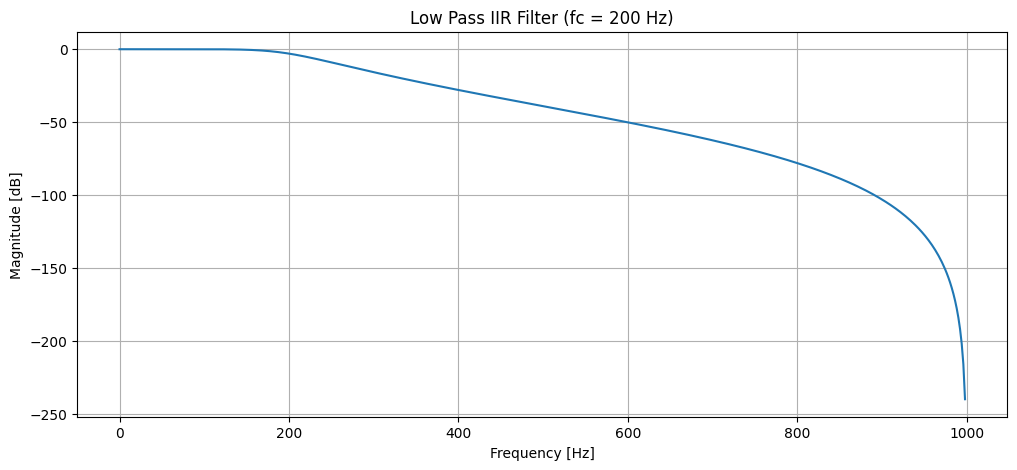

In [13]:
# Normalize frequency (cutoff / Nyquist)
w_low = fc_low / (fs / 2)

# Design 4th order Butterworth Low Pass Filter
b_low, a_low = signal.butter(4, w_low, btype='low', analog=False)

# Frequency response
w, h = signal.freqz(b_low, a_low, fs=fs)

# Plot
plt.figure(figsize=(12,5))
plt.plot(w, 20*np.log10(abs(h)))
plt.title("Low Pass IIR Filter (fc = 200 Hz)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid(True)
plt.show()


### Design High Pass IIR Filter

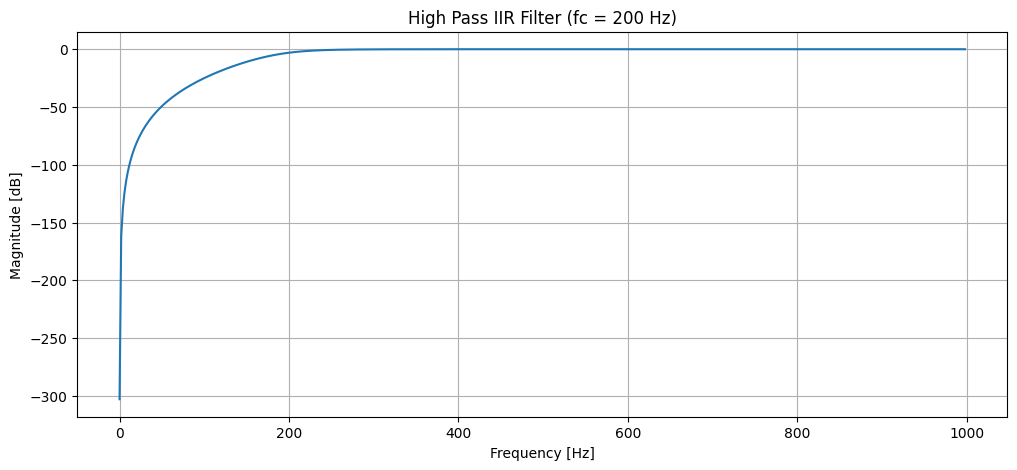

In [15]:
# Normalize frequency
w_high = fc_low / (fs / 2)

# Design 4th order Butterworth High Pass Filter
b_high, a_high = signal.butter(4, w_high, btype='high', analog=False)

# Frequency response
w, h = signal.freqz(b_high, a_high, fs=fs)

# Plot
plt.figure(figsize=(12,5))
plt.plot(w, 20*np.log10(abs(h)))
plt.title("High Pass IIR Filter (fc = 200 Hz)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid(True)
plt.show()

### Design Band Pass IIR Filter

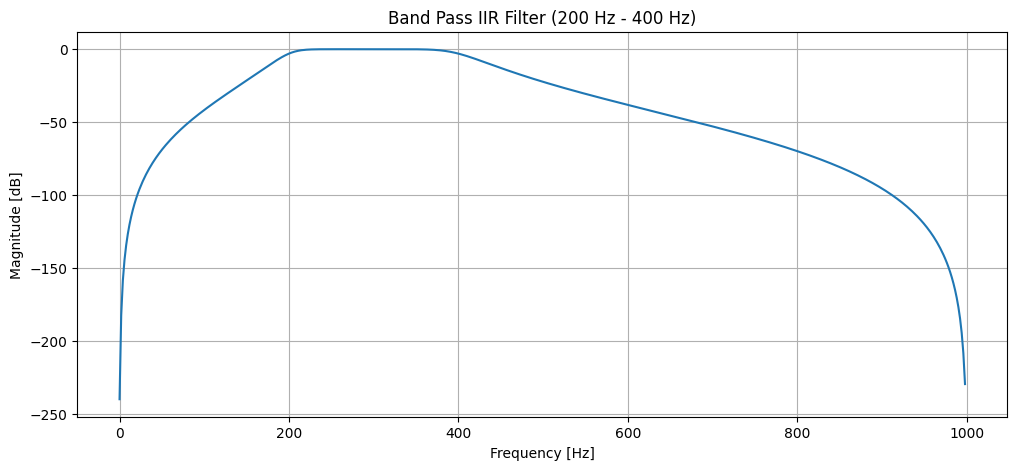

In [18]:
# Normalize frequencies
w_band = [fc_low / (fs / 2), fc_high / (fs / 2)]

# Design 4th order Butterworth Band Pass Filter
b_band, a_band = signal.butter(4, w_band, btype='band', analog=False)

# Frequency response
w, h = signal.freqz(b_band, a_band, fs=fs)

# Plot
plt.figure(figsize=(12,5))
plt.plot(w, 20*np.log10(abs(h)+1e-12))
plt.title("Band Pass IIR Filter (200 Hz - 400 Hz)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid(True)
plt.show()


### Design Band stop IIR Filter

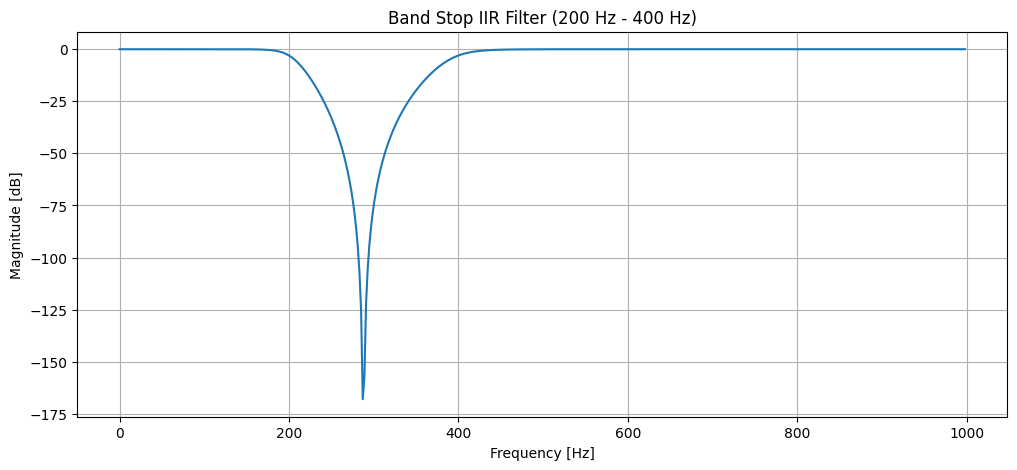

In [19]:
# Normalize frequencies
w_stop = [fc_low / (fs / 2), fc_high / (fs / 2)]

# Design 4th order Butterworth Band Stop Filter
b_stop, a_stop = signal.butter(4, w_stop, btype='bandstop', analog=False)

# Frequency response
w, h = signal.freqz(b_stop, a_stop, fs=fs)

# Plot
plt.figure(figsize=(12,5))
plt.plot(w, 20*np.log10(abs(h)))
plt.title("Band Stop IIR Filter (200 Hz - 400 Hz)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid(True)
plt.show()
